In [1]:
import pandas as pd
import numpy as np

#reading data
attNames = ["a", "b", "c", "d", "e", "f", "g", "h", "i","j","k","l","m","n","o","p"]
FIELD_NAMES = attNames + ["Class"]

trainData = pd.read_csv('pendigits.tra', names=FIELD_NAMES)
testData = pd.read_csv('pendigits.tes', names=FIELD_NAMES)


In [2]:
#Estimating the P(C)
counts = trainData["Class"].value_counts().to_dict()
priors = {(k, v / len(trainData)) for k, v in counts.items()}
print(priors)

{(9, 0.0959434214037897), (0, 0.10408326661329063), (7, 0.10381638644248732), (3, 0.0959434214037897), (8, 0.0959434214037897), (6, 0.09607686148919135), (2, 0.10408326661329063), (5, 0.09607686148919135), (1, 0.10394982652788898), (4, 0.10408326661329063)}


In [3]:
def mean(xi,c):
    f = trainData[(trainData['Class'] == c)]
    mean = f[xi].mean()
    return mean

In [4]:
def variance(xi,c):
    f = trainData[(trainData['Class'] == c)]
    variance = math.pow(f[xi].std(), 2)
    return variance

In [5]:
def GaussianProbabilityDensity(x, mean, variance):
    if(variance == 0):
        variance = 0.000000001
    return (1 / (math.sqrt(2 * math.pi * variance))) * (math.exp(-(math.pow(x - mean, 2) / (2 * variance))))

In [69]:
def perf_measure(y_actual, y_hat):
    TP = 0
    for i in range(len(y_hat)): 
        if(y_actual[i]==y_hat[i]):
            TP += 1

    return TP

In [70]:
import math
def predict(landaR,landaI):
    predictions = []
    i = 0
    nsample = 100
    for _, row in testData.iterrows():
        i+=1
        if(i==nsample):
            break
        results = {}
        for c, pc in priors:
            sumP = 0
            for name in attNames:
                
                pG = GaussianProbabilityDensity(row[name], mean(name,c), variance(name,c))
                if pG > 0:
                    sumP += math.log(pG)
            results[c] = math.log(pc) + sumP
        norm = [float(i)/sum(results) for i in results]
        if(landaR < landaI*(1-(max(norm)))):
            predictions.append(-1)
        else:
            predictions.append(max(results, key=results.get))
    ccr = perf_measure(testData["Class"][:nsample],predictions)/nsample
    return ccr

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
max ccr (array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4], dtype=int64), array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4], dtype=int64))


<Figure size 432x288 with 0 Axes>

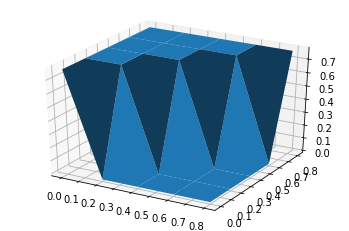

In [82]:
import math
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
dr = np.arange(0,1, 0.2)
di = np.arange(0,1, 0.2)
nu = np.zeros( (dr.size, di.size) )
counter_y = 0

for deta in di:
    counter_x = 0
    for beta in dr:
        print("hi")
        nu[counter_x, counter_y] = predict(beta,deta)
        counter_x += 1
    counter_y += 1
print("max ccr",np.where(nu == np.max(nu)))
X, Y = np.meshgrid(di, dr)

fig = plt.figure()
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, nu)

In [83]:
print(nu)
np.where(nu == np.max(nu))

[[0.77 0.   0.   0.   0.  ]
 [0.77 0.77 0.   0.   0.  ]
 [0.77 0.77 0.77 0.   0.  ]
 [0.77 0.77 0.77 0.77 0.  ]
 [0.77 0.77 0.77 0.77 0.77]]


(array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4], dtype=int64),
 array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4], dtype=int64))